In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

The pandas is trying to read a CSV file using the default utf-8 encoding, but the file contains characters that are not valid UTF-8 — like 0x96, which is typically a Windows-style en dash in Windows-1252 or ISO-8859-1 encodings.

Hence **encoding='cp1252'** is used

In [2]:
df = pd.read_csv("/kaggle/input/cars-datasets-2025/Cars Datasets 2025.csv", encoding='cp1252')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


# Clean Dataset

In [3]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

## Handling Missing Values
- When the missing values are very less then dont impute the values just remove them to keep the data **orignal**
- No need to fill the synthetic values in the data

In [4]:
df.dropna(inplace = True)

In [5]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64

## Handilng Duplicated Values

In [6]:
print(df.duplicated().sum())

4


In [7]:
dupes = df[df.duplicated(keep=False)]
dupes

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
314,Volkswagen,Golf Cabriolet,1.2L I4 Turbo / 2.0L I4 Turbo,1197 cc / 1984 cc,105 - 210 hp,217 km/h,8.4 sec,"$30,000",Petrol,4,200 Nm
336,Volkswagen,Golf Cabriolet,1.2L I4 Turbo / 2.0L I4 Turbo,1197 cc / 1984 cc,105 - 210 hp,217 km/h,8.4 sec,"$30,000",Petrol,4,200 Nm
348,Volkswagen,Jetta Hybrid,1.4L I4 Turbo + Electric Motor,1395 cc,170 hp,210 km/h,8.6 sec,"$28,000",Hybrid,5,250 Nm
354,Volkswagen,Jetta Hybrid,1.4L I4 Turbo + Electric Motor,1395 cc,170 hp,210 km/h,8.6 sec,"$28,000",Hybrid,5,250 Nm
629,Tata Motors,Tiago EV,Permanent Magnet Synchronous,24 kWh,74 hp,120 km/h,5.7 sec,"$11,000",Electric,5,114 Nm
658,Tata Motors,Tiago EV,Permanent Magnet Synchronous,24 kWh,74 hp,120 km/h,5.7 sec,"$11,000",Electric,5,114 Nm
750,Chevrolet,Tahoe RST,5.3L V8 Gasoline,5300 cc,355 hp,180 km/h,7.4 sec,"$64,100",Petrol,7,519 Nm
755,Chevrolet,Tahoe RST,5.3L V8 Gasoline,5300 cc,355 hp,180 km/h,7.4 sec,"$64,100",Petrol,7,519 Nm


In [8]:
df = df[df.duplicated() == False]

In [9]:
df.duplicated().sum()

0

# Prepare Dataset
- Includes Handing Datatypes
- Includes striping the required values
- Removing the unwanted repeated units

In [10]:
df.sample(5)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
814,GMC,Yukon Denali Ultimate Black,6.2L V8 engine,"6,162 cc",420 hp,210 km/h,6.0 sec,"$90,000",Petrol,8,624 Nm
403,Nissan,Ariya,Dual Electric Motors,87 kWh,389 HP,200 km/h,5.1 sec,"$58,950",Electric,5,600 Nm
332,Volkswagen,Touareg V8,4.0L V8 Turbo Diesel,3956 cc,421 hp,250 km/h,4.9 sec,"$70,000",Petrol,5,770 Nm
855,Kia,Niro SX Touring,1.6L 4-Cylinder Hybrid,1591 cc,139 hp,180 km/h,10.5 sec,"$34,500",Hybrid,5,265 Nm
1156,Mazda,626,2.0L Inline-4,"2,000 cc",140 hp,190 km/h,9.5 sec,"$18,000 - $22,000",Petrol,5,180 Nm


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1206 non-null   object
 1   Cars Names                 1206 non-null   object
 2   Engines                    1206 non-null   object
 3   CC/Battery Capacity        1206 non-null   object
 4   HorsePower                 1206 non-null   object
 5   Total Speed                1206 non-null   object
 6   Performance(0 - 100 )KM/H  1206 non-null   object
 7   Cars Prices                1206 non-null   object
 8   Fuel Types                 1206 non-null   object
 9   Seats                      1206 non-null   object
 10  Torque                     1206 non-null   object
dtypes: object(11)
memory usage: 113.1+ KB


In [12]:
import re
def CC(txt):
    r = re.search('cc', txt)
    if r:
        return True
    else:
        return False


## Making The CC units dataset different(Electric vehichels are excluded)

In [13]:
df['CC'] = df['CC/Battery Capacity'].apply(CC)
df_CC = df[df['CC'] == True]
df_CC.drop('CC',axis = 1,inplace = True)

/tmp/ipykernel_36/460408447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CC.drop('CC',axis = 1,inplace = True)


In [14]:
df_CC.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [15]:
def hp(txt):
    r = re.findall('\d+', txt)[0]
    return int(r)

In [16]:
def time(txt):
    r = re.findall('[\d.]+', txt)[0]
    return float(r)

In [17]:
def cc(txt):
    r = re.findall('[\d,]+', txt)[0]
    return int(r.replace(',',''))

## Removing units from all the columns

In [18]:
df_CC['CC/Battery Capacity'] = df_CC['CC/Battery Capacity'].apply(cc).astype(int)
df_CC['HorsePower'] = df_CC['HorsePower'].apply(hp).astype(int)
df_CC['Total Speed'] = df_CC['Total Speed'].apply(hp).astype(int)
df_CC['Performance(0 - 100 )KM/H'] = df_CC['Performance(0 - 100 )KM/H'].apply(time).astype(float)
df_CC['Cars Prices'] = df_CC['Cars Prices'].apply(cc).astype(int)
df_CC['Seats'] = df_CC['Seats'].apply(hp).astype(int)
df_CC['Torque'] = df_CC['Torque'].apply(hp).astype(int)

/tmp/ipykernel_36/2362894917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CC['CC/Battery Capacity'] = df_CC['CC/Battery Capacity'].apply(cc).astype(int)
/tmp/ipykernel_36/2362894917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CC['HorsePower'] = df_CC['HorsePower'].apply(hp).astype(int)
/tmp/ipykernel_36/2362894917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [19]:
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1100 non-null   object 
 1   Cars Names                 1100 non-null   object 
 2   Engines                    1100 non-null   object 
 3   CC/Battery Capacity        1100 non-null   int64  
 4   HorsePower                 1100 non-null   int64  
 5   Total Speed                1100 non-null   int64  
 6   Performance(0 - 100 )KM/H  1100 non-null   float64
 7   Cars Prices                1100 non-null   int64  
 8   Fuel Types                 1100 non-null   object 
 9   Seats                      1100 non-null   int64  
 10  Torque                     1100 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 103.1+ KB


### Now the datatypes are well set

In [20]:
df_CC['Company Names'] = df['Company Names'].str.strip()

/tmp/ipykernel_36/508754851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CC['Company Names'] = df['Company Names'].str.strip()


In [21]:
def categorize(d):
    brand_category_map = {
    'Bugatti': 'Ultra Luxury',
    'Rolls ROYCE': 'Ultra Luxury',
    'ROLLS ROYCE' : 'Ultra Luxury',
    'LAMBORGHINI': 'Ultra Luxury',
    'FERRARI': 'Ultra Luxury',
    'ASTON MARTIN': 'Ultra Luxury',
    
    'Porsche': 'Luxury',
    'BMW': 'Luxury',
    'AUDI': 'Luxury',
    'MERCEDES': 'Luxury',
    'BENTLEY': 'Luxury',
    'Jaguar Land Rover': 'Luxury',
    'Cadillac': 'Luxury',
    'ACURA': 'Luxury',
    'Acura': 'Luxury',
    'VOLVO': 'Luxury',
        
    'Ford': 'Upper Mid-Range',
    'Chevrolet': 'Upper Mid-Range',
    'Jeep': 'Upper Mid-Range',
    'Volkswagen': 'Upper Mid-Range',
    'Volvo': 'Upper Mid-Range',
    'GMC': 'Upper Mid-Range',
    'Nissan': 'Upper Mid-Range',
    'NISSAN': 'Upper Mid-Range',  # Normalize duplicates

    'Toyota': 'Mid-Range',
    'TOYOTA': 'Mid-Range',
    'HONDA': 'Mid-Range',
    'HYUNDAI': 'Mid-Range',
    'Kia': 'Mid-Range',
    'KIA': 'Mid-Range',
    'Mazda': 'Mid-Range',
    'Mitsubishi': 'Mid-Range',

    'MARUTI SUZUKI': 'Budget',
    'Maruti SUZUKI': 'Budget',
    'Tata Motors': 'Budget',
    'MAHINDRA': 'Budget',
    'Peugeot': 'Budget'
    }
    
    fuel_category_map = {
        'plug in hyrbrid': 'Hybrid',         # likely typo
        'Petrol': 'Petrol',
        'Diesel': 'Diesel',
        'Hybrid': 'Hybrid',
        'Petrol/Diesel': 'Petrol',
        'Plug-in Hybrid': 'Hybrid',
        'Petrol/AWD': 'Petrol',
        'Petrol/Hybrid': 'Hybrid',
        'Hydrogen': 'Other',                 # can exclude or treat separately
        'Diesel/Petrol': 'Diesel',
        'Petrol/EV': 'Petrol',
        'Hybrid/Electric': 'Hybrid',
        'Petrol, Hybrid': 'Hybrid',
        'Petrol, Diesel': 'Petrol',
        'CNG/Petrol': 'Hybrid',
        'Hybrid/Petrol': 'Hybrid',
        'Hybrid (Gas + Electric)': 'Hybrid',
        'Gas / Hybrid': 'Hybrid',
        'Hybrid / Plug-in': 'Hybrid'
    }
    d['Fuel_Types'] = d['Fuel Types'].map(fuel_category_map)
    d['brand_labels'] = d['Company Names'].map(brand_category_map)

In [22]:
categorize(df_CC)

/tmp/ipykernel_36/1478491382.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Fuel_Types'] = d['Fuel Types'].map(fuel_category_map)
/tmp/ipykernel_36/1478491382.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['brand_labels'] = d['Company Names'].map(brand_category_map)


In [23]:
df_CC['brand_labels'].isnull().sum()

0

## The dataset is now prepared

# EDA

In [24]:
def eda_report(df, target_column=None, show_plots=True, top_n=20):
    """
    Perform EDA on numerical and categorical columns.
    
    Parameters:
    - df: pandas DataFrame
    - target_column: optional, name of target column for distribution plots
    - show_plots: if False, skips plotting
    - top_n: number of top categorical features to analyze (by cardinality)
    """
    
    print("="*30)
    print("🔍 DATASET OVERVIEW")
    print("="*30)
    print(f"Shape: {df.shape}")
    print("\nMissing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))
    print("\nData types:")
    print(df.dtypes.value_counts())
    
    # Split into numeric and categorical
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    if target_column and target_column in num_cols:
        num_cols.remove(target_column)
    
    print(f"\nNumeric columns: {len(num_cols)}")
    print(f"Categorical columns: {len(cat_cols)}")

    # Numerical analysis
    if num_cols:
        print("\n📊 NUMERICAL FEATURES SUMMARY")
        display(df[num_cols].describe().T)

        if show_plots:
            for col in num_cols:
                plt.figure(figsize=(14, 4))
                plt.subplot(1, 2, 1)
                sns.histplot(df[col].dropna(), kde=True, bins=30)
                plt.title(f"Histogram: {col}")

                plt.subplot(1, 2, 2)
                sns.boxplot(x=df[col])
                plt.title(f"Boxplot: {col}")
                plt.tight_layout()
                plt.show()
    
    # Correlation matrix
    if len(num_cols) > 1 and show_plots:
        corr = df[num_cols].corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
        plt.title("Correlation Heatmap")
        plt.show()

    # Categorical analysis
    if cat_cols:
        print("\n📁 CATEGORICAL FEATURES SUMMARY")

        for col in cat_cols[:top_n]:
            print(f"\nColumn: {col}")
            print(df[col].value_counts(normalize=True).head(10))

            if show_plots:
                plt.figure(figsize=(8, 4))
                sns.countplot(y=col, data=df, order=df[col].value_counts().iloc[:10].index)
                plt.title(f"Top Categories in {col}")
                plt.tight_layout()
                plt.show()

    # Target distribution
    if target_column:
        print("\n🎯 TARGET VARIABLE DISTRIBUTION")
        if df[target_column].nunique() <= 10:
            print(df[target_column].value_counts(normalize=True))
            if show_plots:
                sns.countplot(x=target_column, data=df)
                plt.title("Target Distribution")
                plt.show()
        else:
            print(df[target_column].describe())
            if show_plots:
                sns.histplot(df[target_column], kde=True)
                plt.title("Target Distribution")
                plt.show()

🔍 DATASET OVERVIEW
Shape: (1100, 13)

Missing values:
Series([], dtype: int64)

Data types:
object     6
int64      6
float64    1
Name: count, dtype: int64

Numeric columns: 7
Categorical columns: 6

📊 NUMERICAL FEATURES SUMMARY


,count,mean,std,min,25%,50%,75%,max
CC/Battery Capacity,1100.0,2997.689091,1830.960899,360.0,1600.0,2480.0,3708.25,16100.0
HorsePower,1100.0,295.061818,210.123599,26.0,148.0,248.0,392.00,1850.0
Total Speed,1100.0,218.911818,52.687763,80.0,180.0,210.0,250.00,500.0
Performance(0 - 100 )KM/H,1100.0,7.715182,3.332368,2.2,5.5,7.3,9.50,35.0
Cars Prices,1100.0,144021.535455,740964.015686,4000.0,26400.0,40000.0,70000.00,18000000.0
Seats,1100.0,4.825455,1.467416,1.0,4.0,5.0,5.00,12.0
Torque,1100.0,423.666364,293.332245,1.0,250.0,366.0,543.50,3500.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


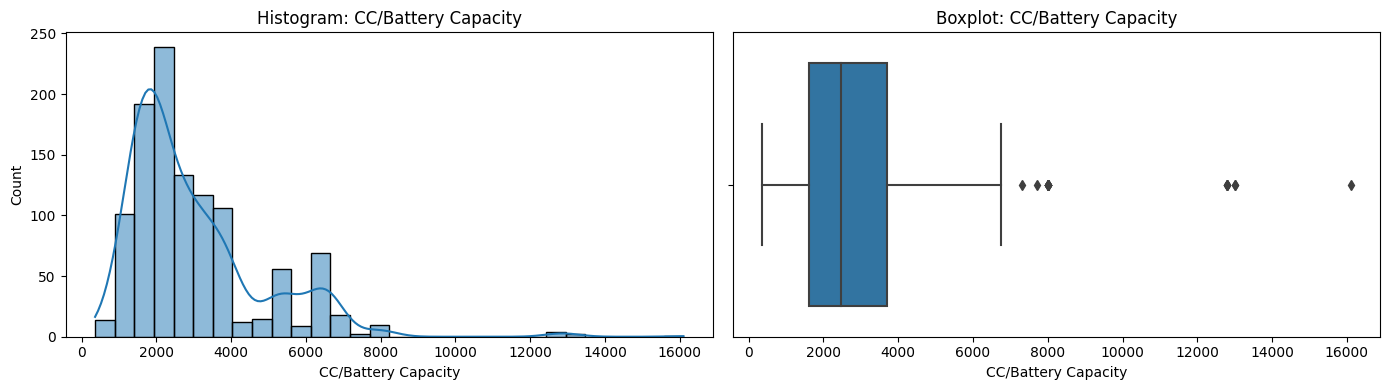

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


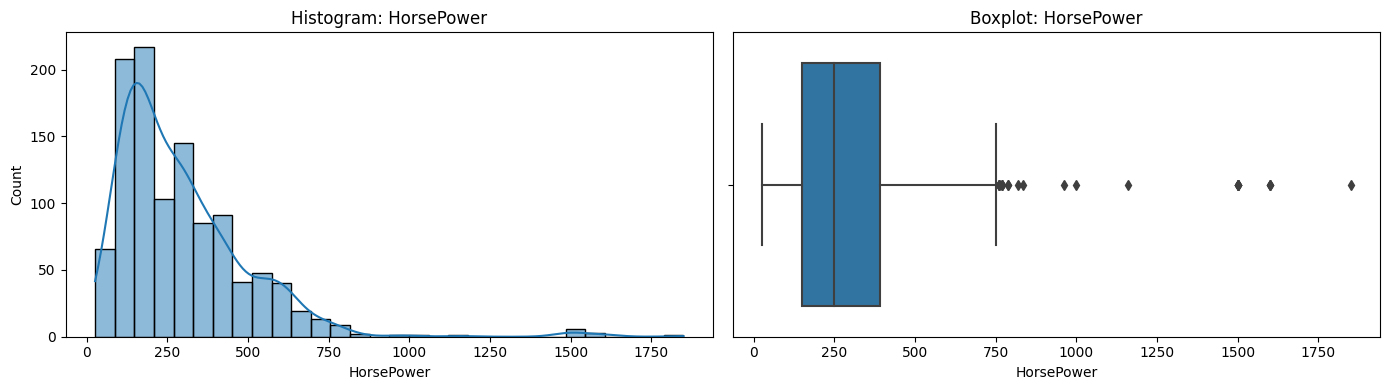

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


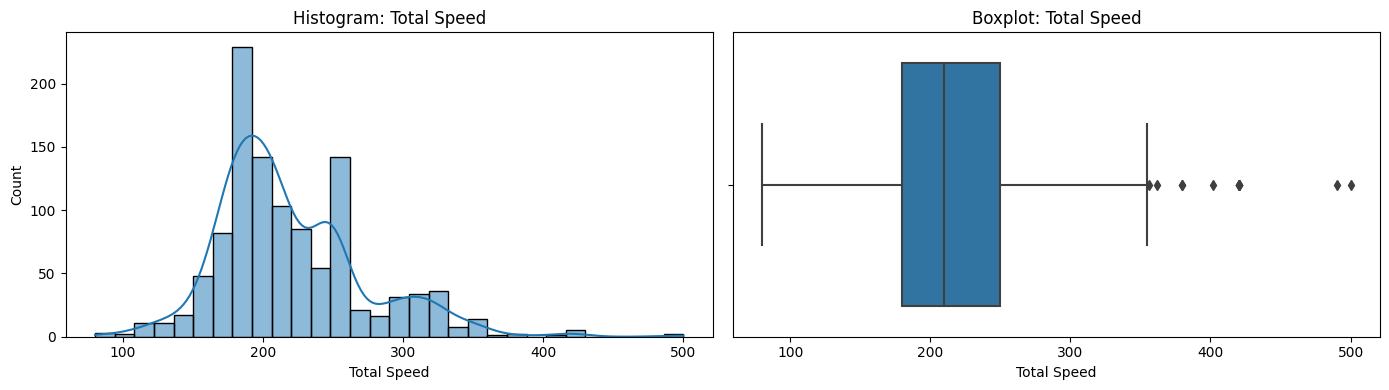

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


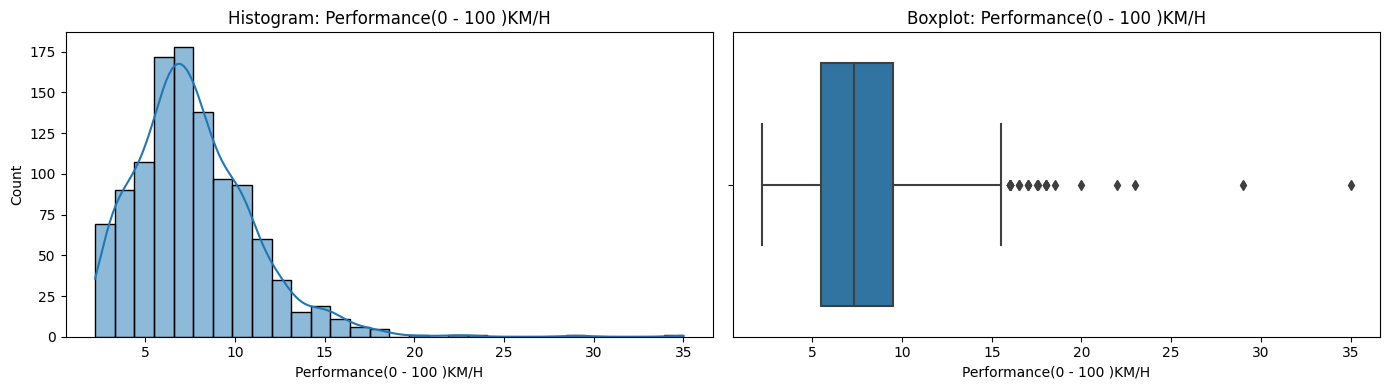

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


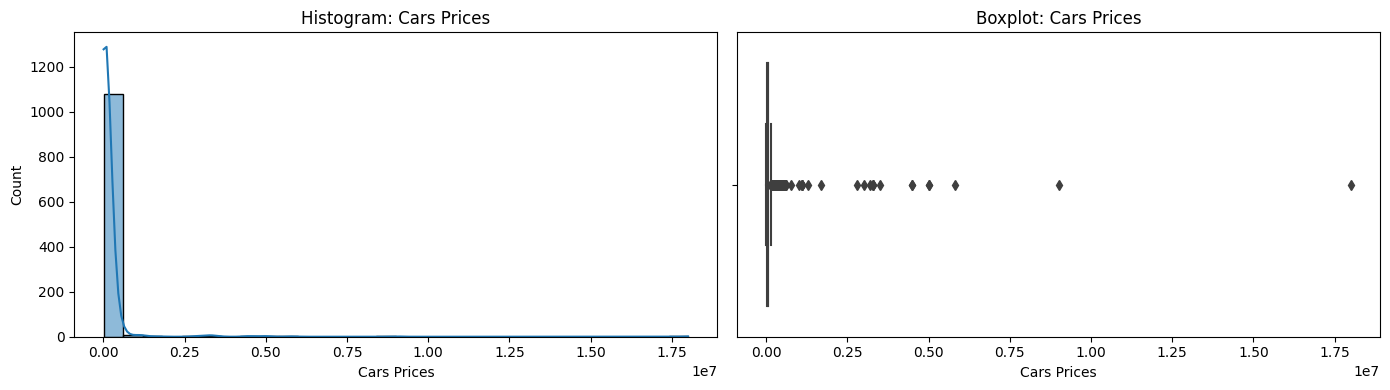

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


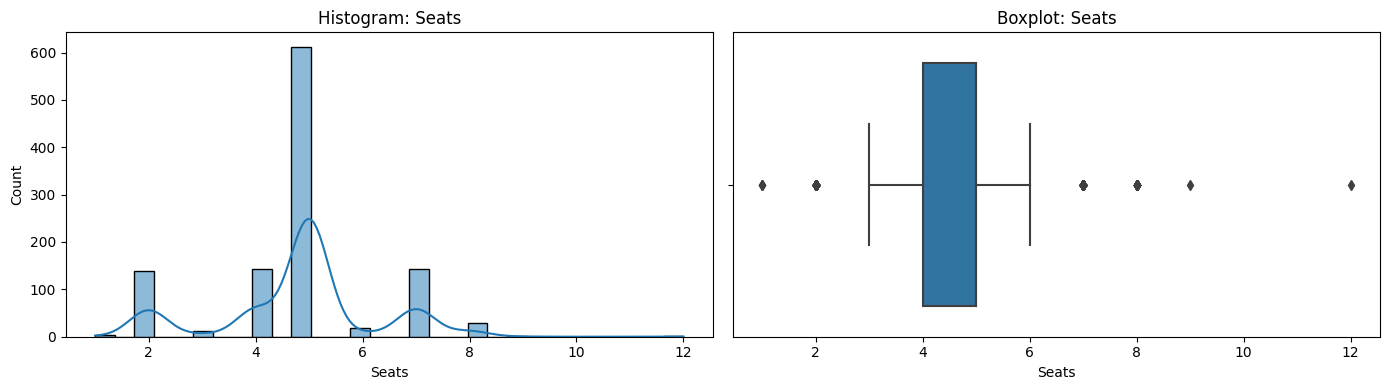

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


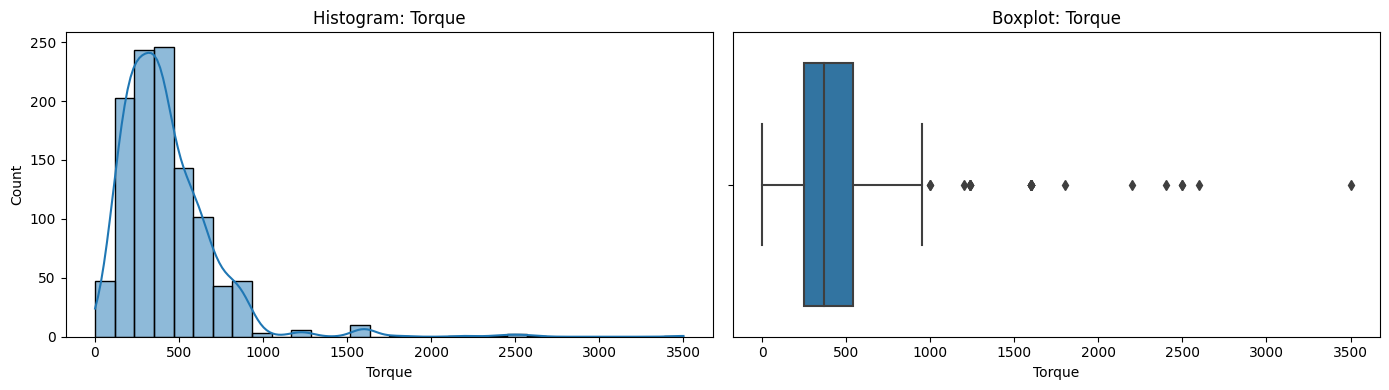

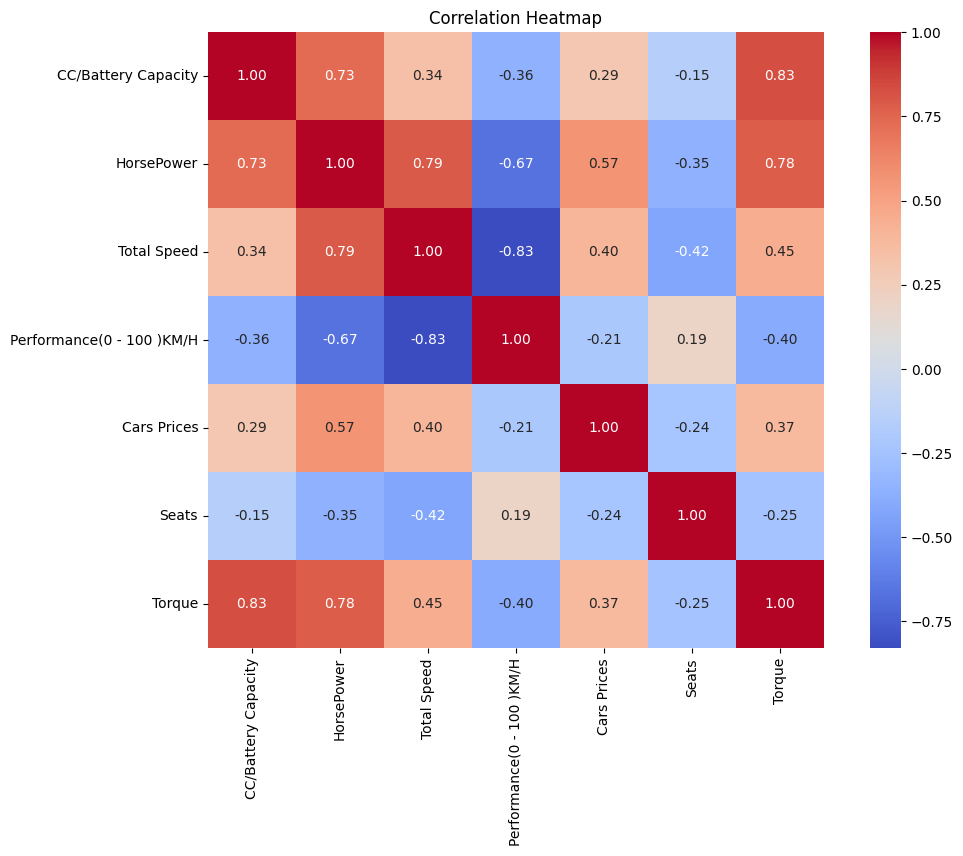


📁 CATEGORICAL FEATURES SUMMARY

Column: Company Names
Company Names
Nissan        0.129091
Volkswagen    0.082727
Mazda         0.077273
Porsche       0.070909
Mitsubishi    0.050000
Chevrolet     0.048182
Ford          0.046364
GMC           0.046364
Peugeot       0.044545
Kia           0.043636
Name: proportion, dtype: float64


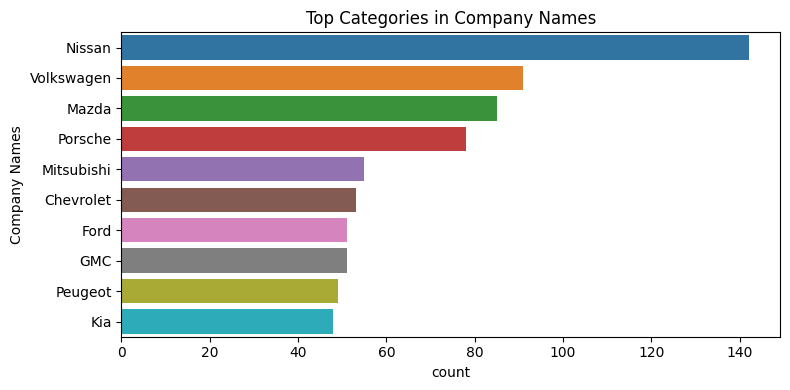


Column: Cars Names
Cars Names
Panamera Platinum Edition             0.001818
Macan S                               0.001818
KA+                                   0.001818
Mistral                               0.001818
508 PSE (Peugeot Sport Engineered)    0.001818
Polo BlueMotion                       0.001818
911 Carrera 4                         0.001818
Malibu Premier                        0.001818
NX Coupe                              0.001818
Macan T                               0.001818
Name: proportion, dtype: float64


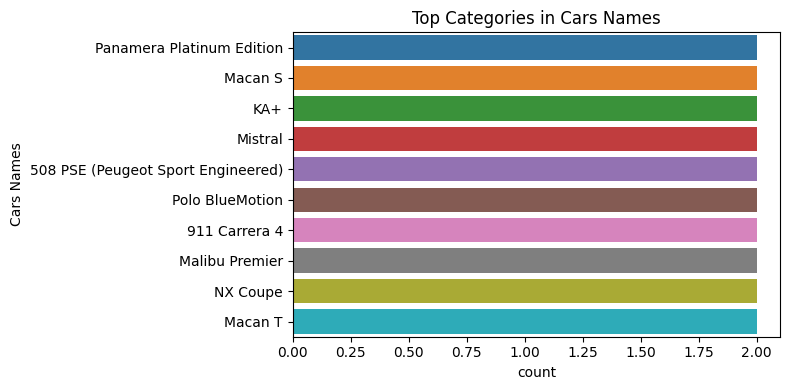


Column: Engines
Engines
I4                        0.058182
V12                       0.046364
V6                        0.035455
Inline-4                  0.034545
V8                        0.030909
2.0L Inline-4             0.018182
1.6L Inline-4             0.017273
5.6L V8                   0.015455
3.0L Twin-Turbo Flat-6    0.013636
2.0L I4 Turbo             0.013636
Name: proportion, dtype: float64


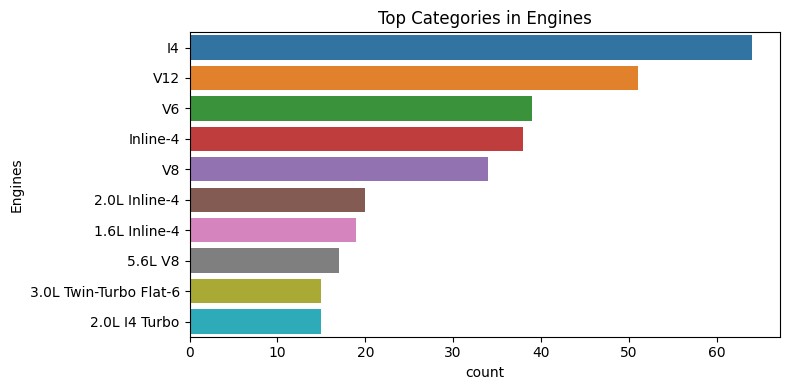


Column: Fuel Types
Fuel Types
Petrol            0.789091
Diesel            0.092727
Hybrid            0.066364
Petrol/Diesel     0.014545
Petrol/Hybrid     0.014545
Plug-in Hybrid    0.004545
Diesel/Petrol     0.003636
Petrol, Diesel    0.002727
Petrol/AWD        0.001818
Petrol, Hybrid    0.001818
Name: proportion, dtype: float64


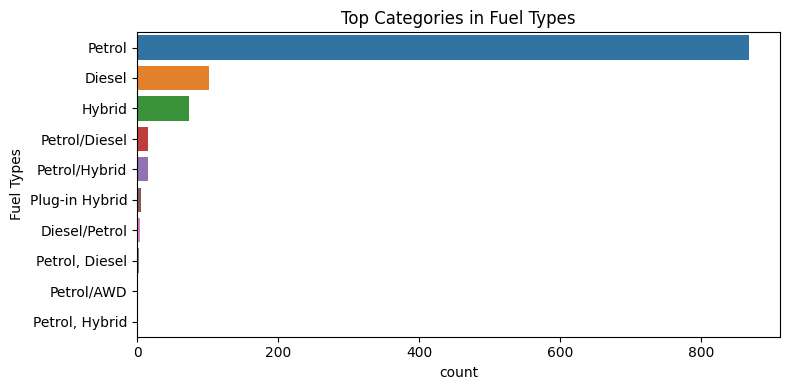


Column: Fuel_Types
Fuel_Types
Petrol    0.809091
Diesel    0.096364
Hybrid    0.093636
Other     0.000909
Name: proportion, dtype: float64


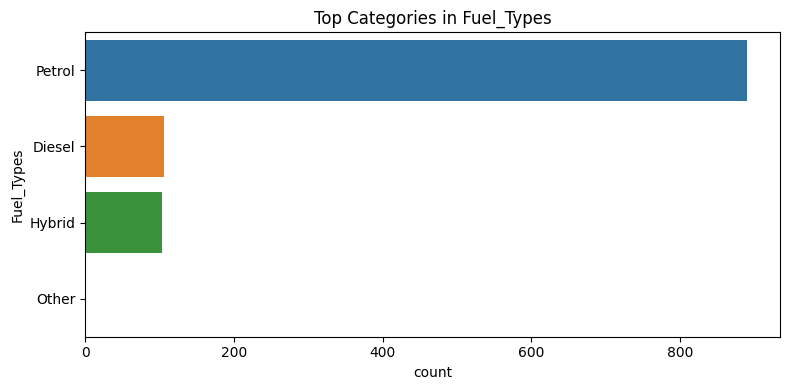


Column: brand_labels
brand_labels
Upper Mid-Range    0.382727
Mid-Range          0.250909
Luxury             0.218182
Ultra Luxury       0.076364
Budget             0.071818
Name: proportion, dtype: float64


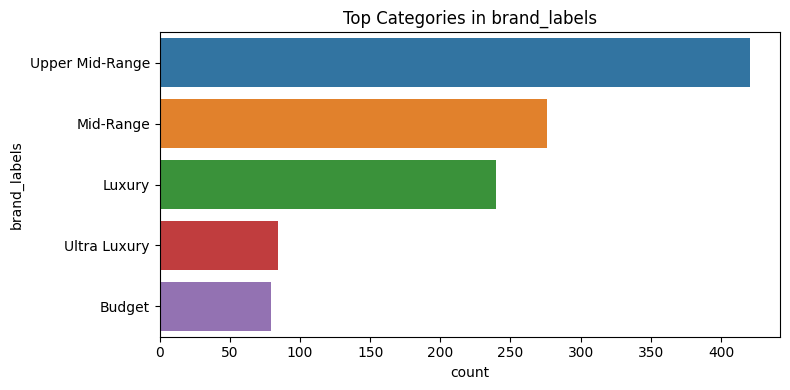

In [25]:
eda_report(df_CC)

## EDA Report
#### After looking into the eda report there are many outliers in prices column which make the model perform very bad

## Removing Outliers and seeing the effect

In [26]:
def outliers(d,value):
    Q1 = d[value].quantile(0.25)
    Q3 = d[value].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = d[(d[value] > (Q1 - (1.5 * IQR))) & (d[value] < (Q3 + 1.5 * IQR))]
    return outliers

In [27]:
df_without_outliers = outliers(df_CC,'Cars Prices')

In [28]:
len(df_without_outliers)

961

<Axes: xlabel='Cars Prices', ylabel='HorsePower'>

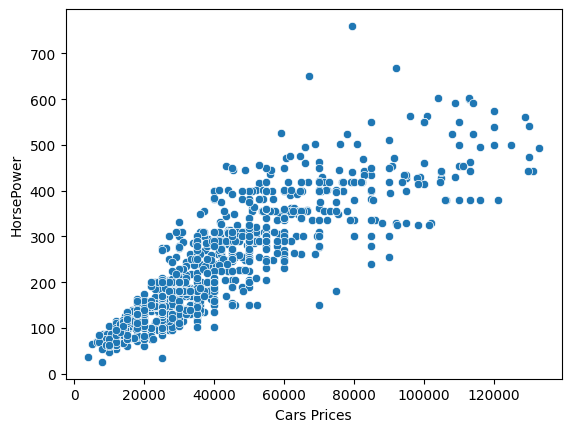

In [29]:
sns.scatterplot(data = df_without_outliers,x = 'Cars Prices',y = 'HorsePower')

🔍 DATASET OVERVIEW
Shape: (961, 13)

Missing values:
Series([], dtype: int64)

Data types:
object     6
int64      6
float64    1
Name: count, dtype: int64

Numeric columns: 7
Categorical columns: 6

📊 NUMERICAL FEATURES SUMMARY


,count,mean,std,min,25%,50%,75%,max
CC/Battery Capacity,961.0,2670.493236,1587.658919,360.0,1598.0,2000.0,3000.0,13000.0
HorsePower,961.0,239.048907,122.251349,26.0,140.0,204.0,310.0,760.0
Total Speed,961.0,206.127992,38.256253,80.0,180.0,200.0,230.0,320.0
Performance(0 - 100 )KM/H,961.0,8.297711,3.117250,2.9,6.3,7.7,10.0,35.0
Cars Prices,961.0,42535.503642,24903.594732,4000.0,25000.0,36000.0,55000.0,133000.0
Seats,961.0,5.072841,1.316918,2.0,5.0,5.0,5.0,12.0
Torque,961.0,367.686785,236.556086,1.0,230.0,350.0,450.0,2600.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


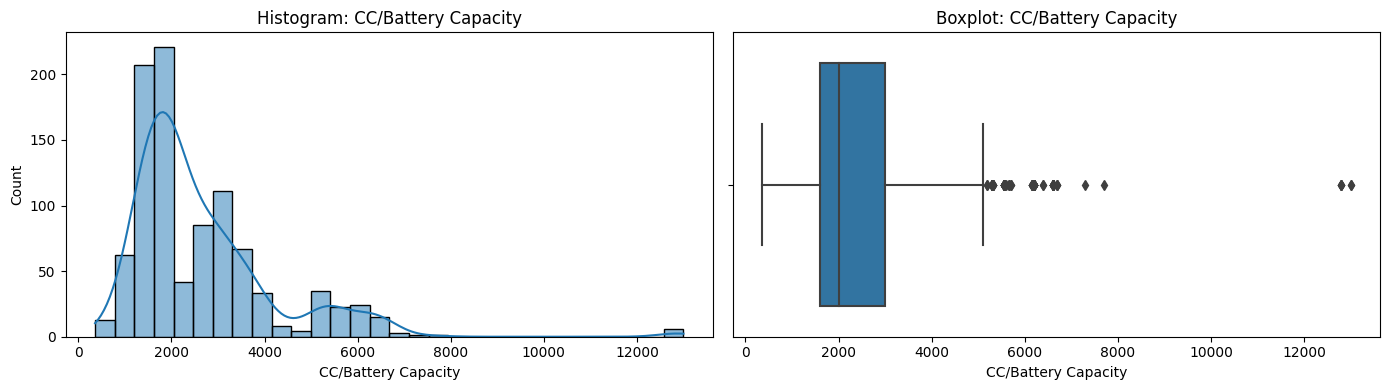

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


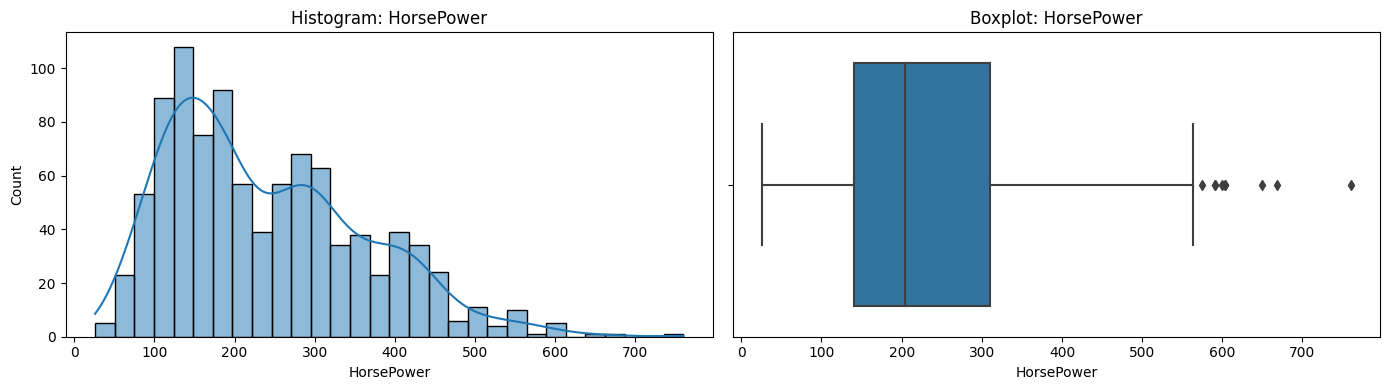

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


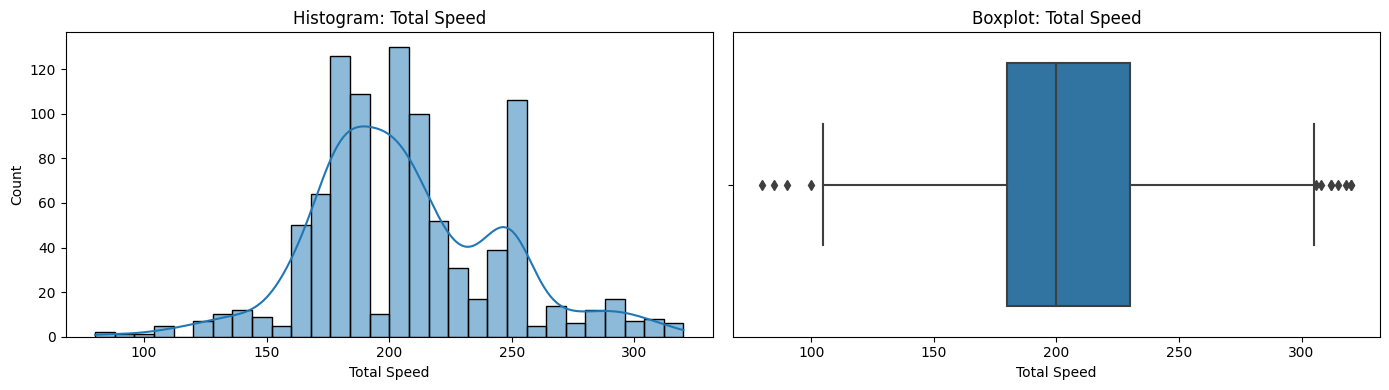

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


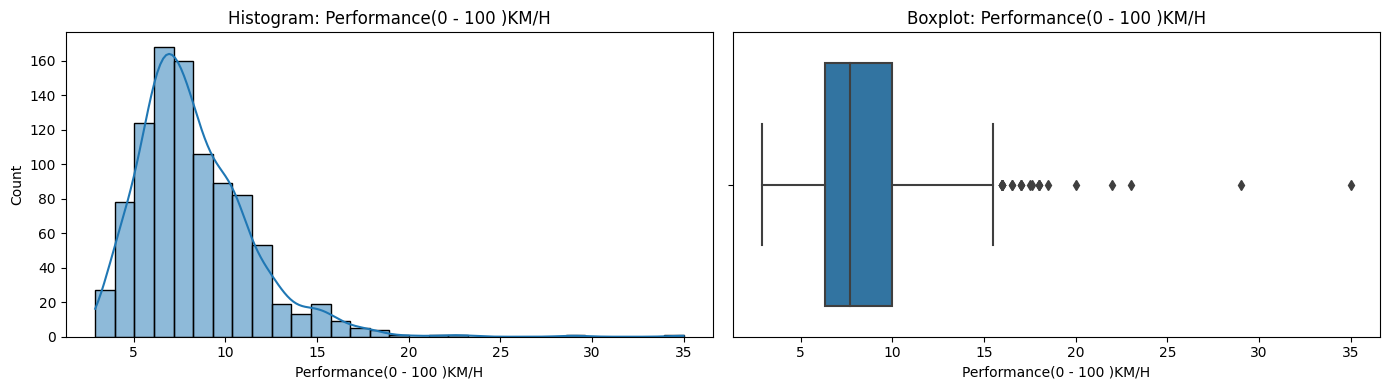

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


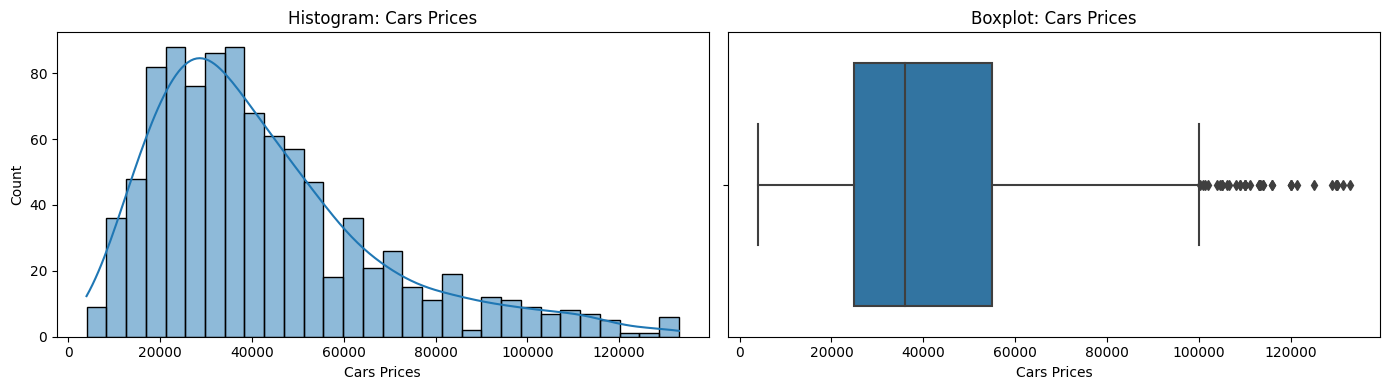

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


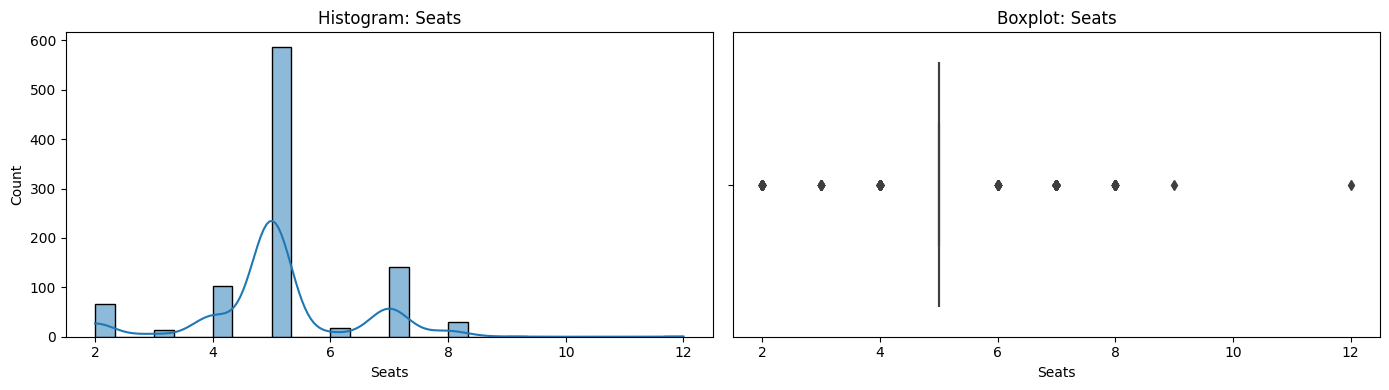

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


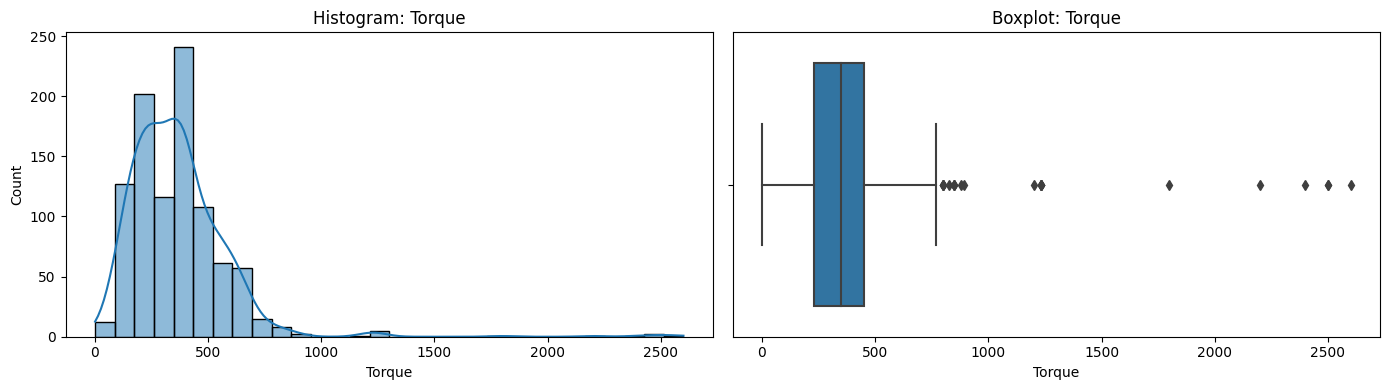

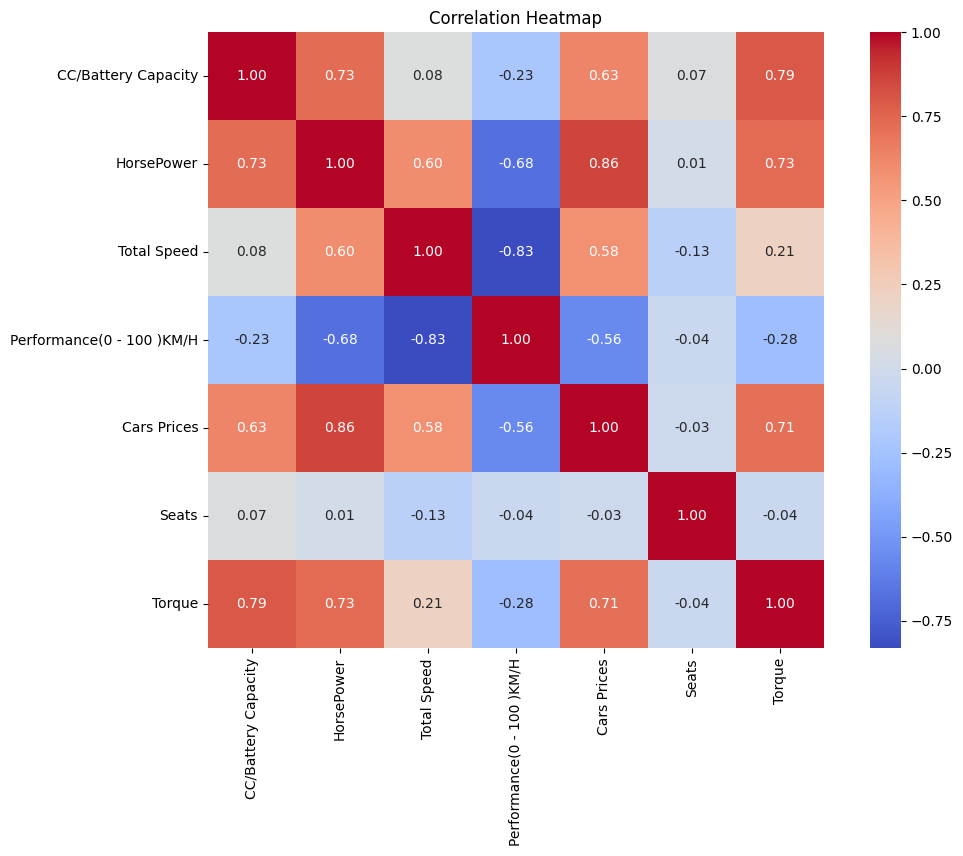


📁 CATEGORICAL FEATURES SUMMARY

Column: Company Names
Company Names
Nissan        0.140479
Volkswagen    0.093652
Mazda         0.087409
Mitsubishi    0.057232
Chevrolet     0.055151
GMC           0.053070
Ford          0.052029
Peugeot       0.050989
Kia           0.049948
Porsche       0.049948
Name: proportion, dtype: float64


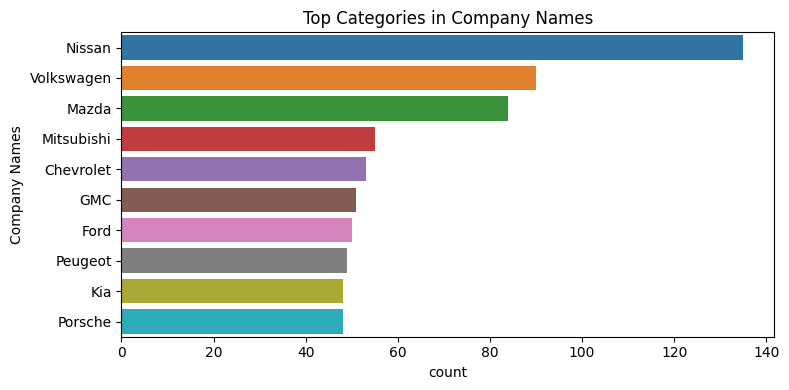


Column: Cars Names
Cars Names
KA+                          0.002081
Macan T                      0.002081
Panamera Platinum Edition    0.002081
NX Coupe                     0.002081
200SX                        0.002081
Macan S                      0.002081
Macan GTS                    0.002081
Polo BlueMotion              0.002081
Malibu Premier               0.002081
911 Carrera 4                0.002081
Name: proportion, dtype: float64


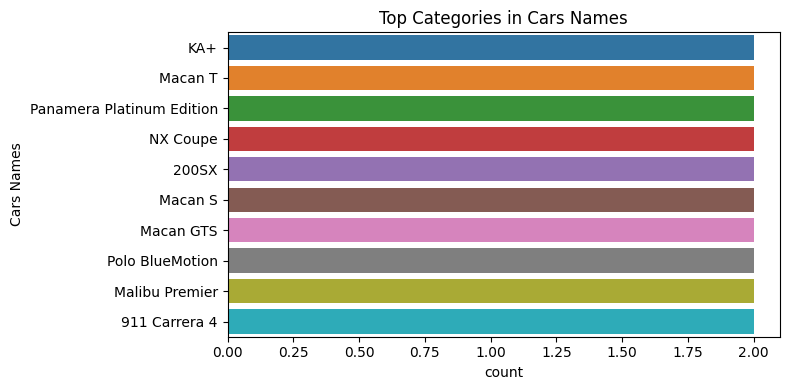


Column: Engines
Engines
I4                  0.066597
V6                  0.040583
Inline-4            0.039542
2.0L Inline-4       0.020812
1.6L Inline-4       0.019771
5.6L V8             0.017690
2.0L I4 Turbo       0.015609
5.3L V8 Gasoline    0.015609
6.2L V8 Gasoline    0.015609
V8                  0.014568
Name: proportion, dtype: float64


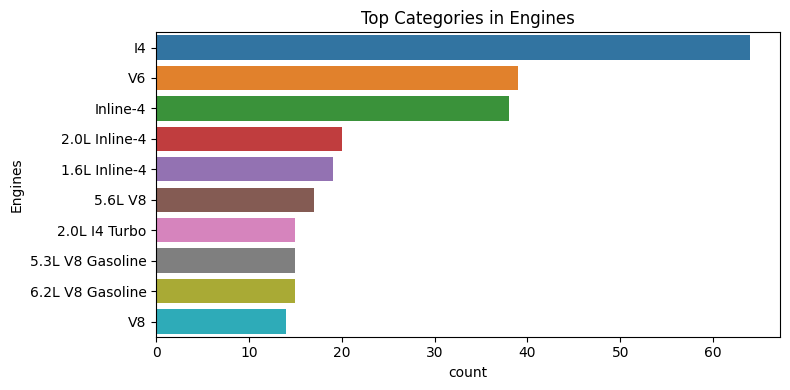


Column: Fuel Types
Fuel Types
Petrol            0.773153
Diesel            0.105099
Hybrid            0.063476
Petrol/Diesel     0.016649
Petrol/Hybrid     0.016649
Plug-in Hybrid    0.005203
Diesel/Petrol     0.004162
Petrol, Diesel    0.003122
Petrol/AWD        0.002081
Petrol, Hybrid    0.002081
Name: proportion, dtype: float64


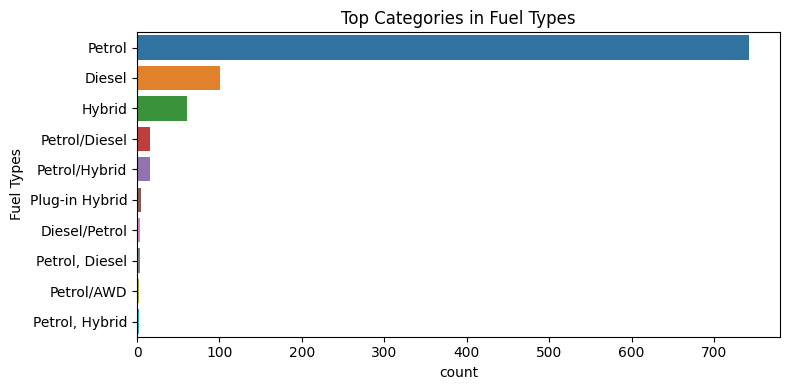


Column: Fuel_Types
Fuel_Types
Petrol    0.796046
Diesel    0.109261
Hybrid    0.093652
Other     0.001041
Name: proportion, dtype: float64


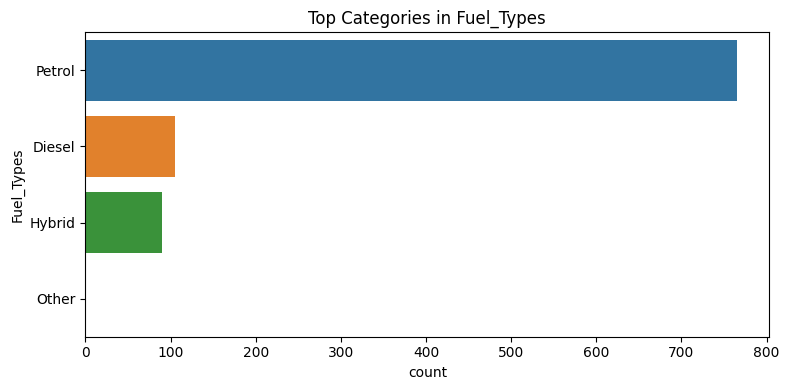


Column: brand_labels
brand_labels
Upper Mid-Range    0.427680
Mid-Range          0.285120
Luxury             0.204995
Budget             0.082206
Name: proportion, dtype: float64


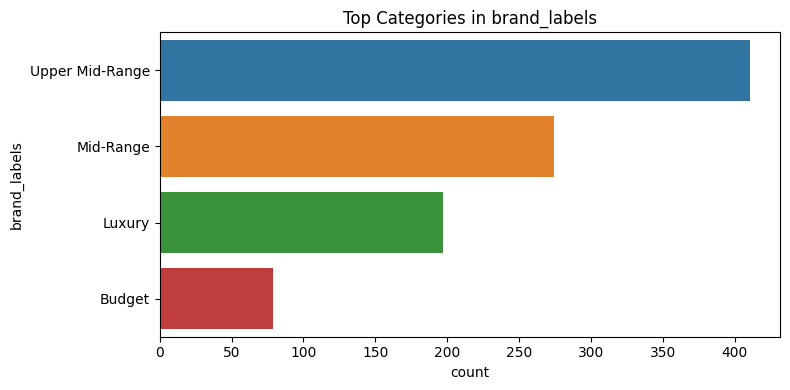

In [30]:
eda_report(df_without_outliers)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

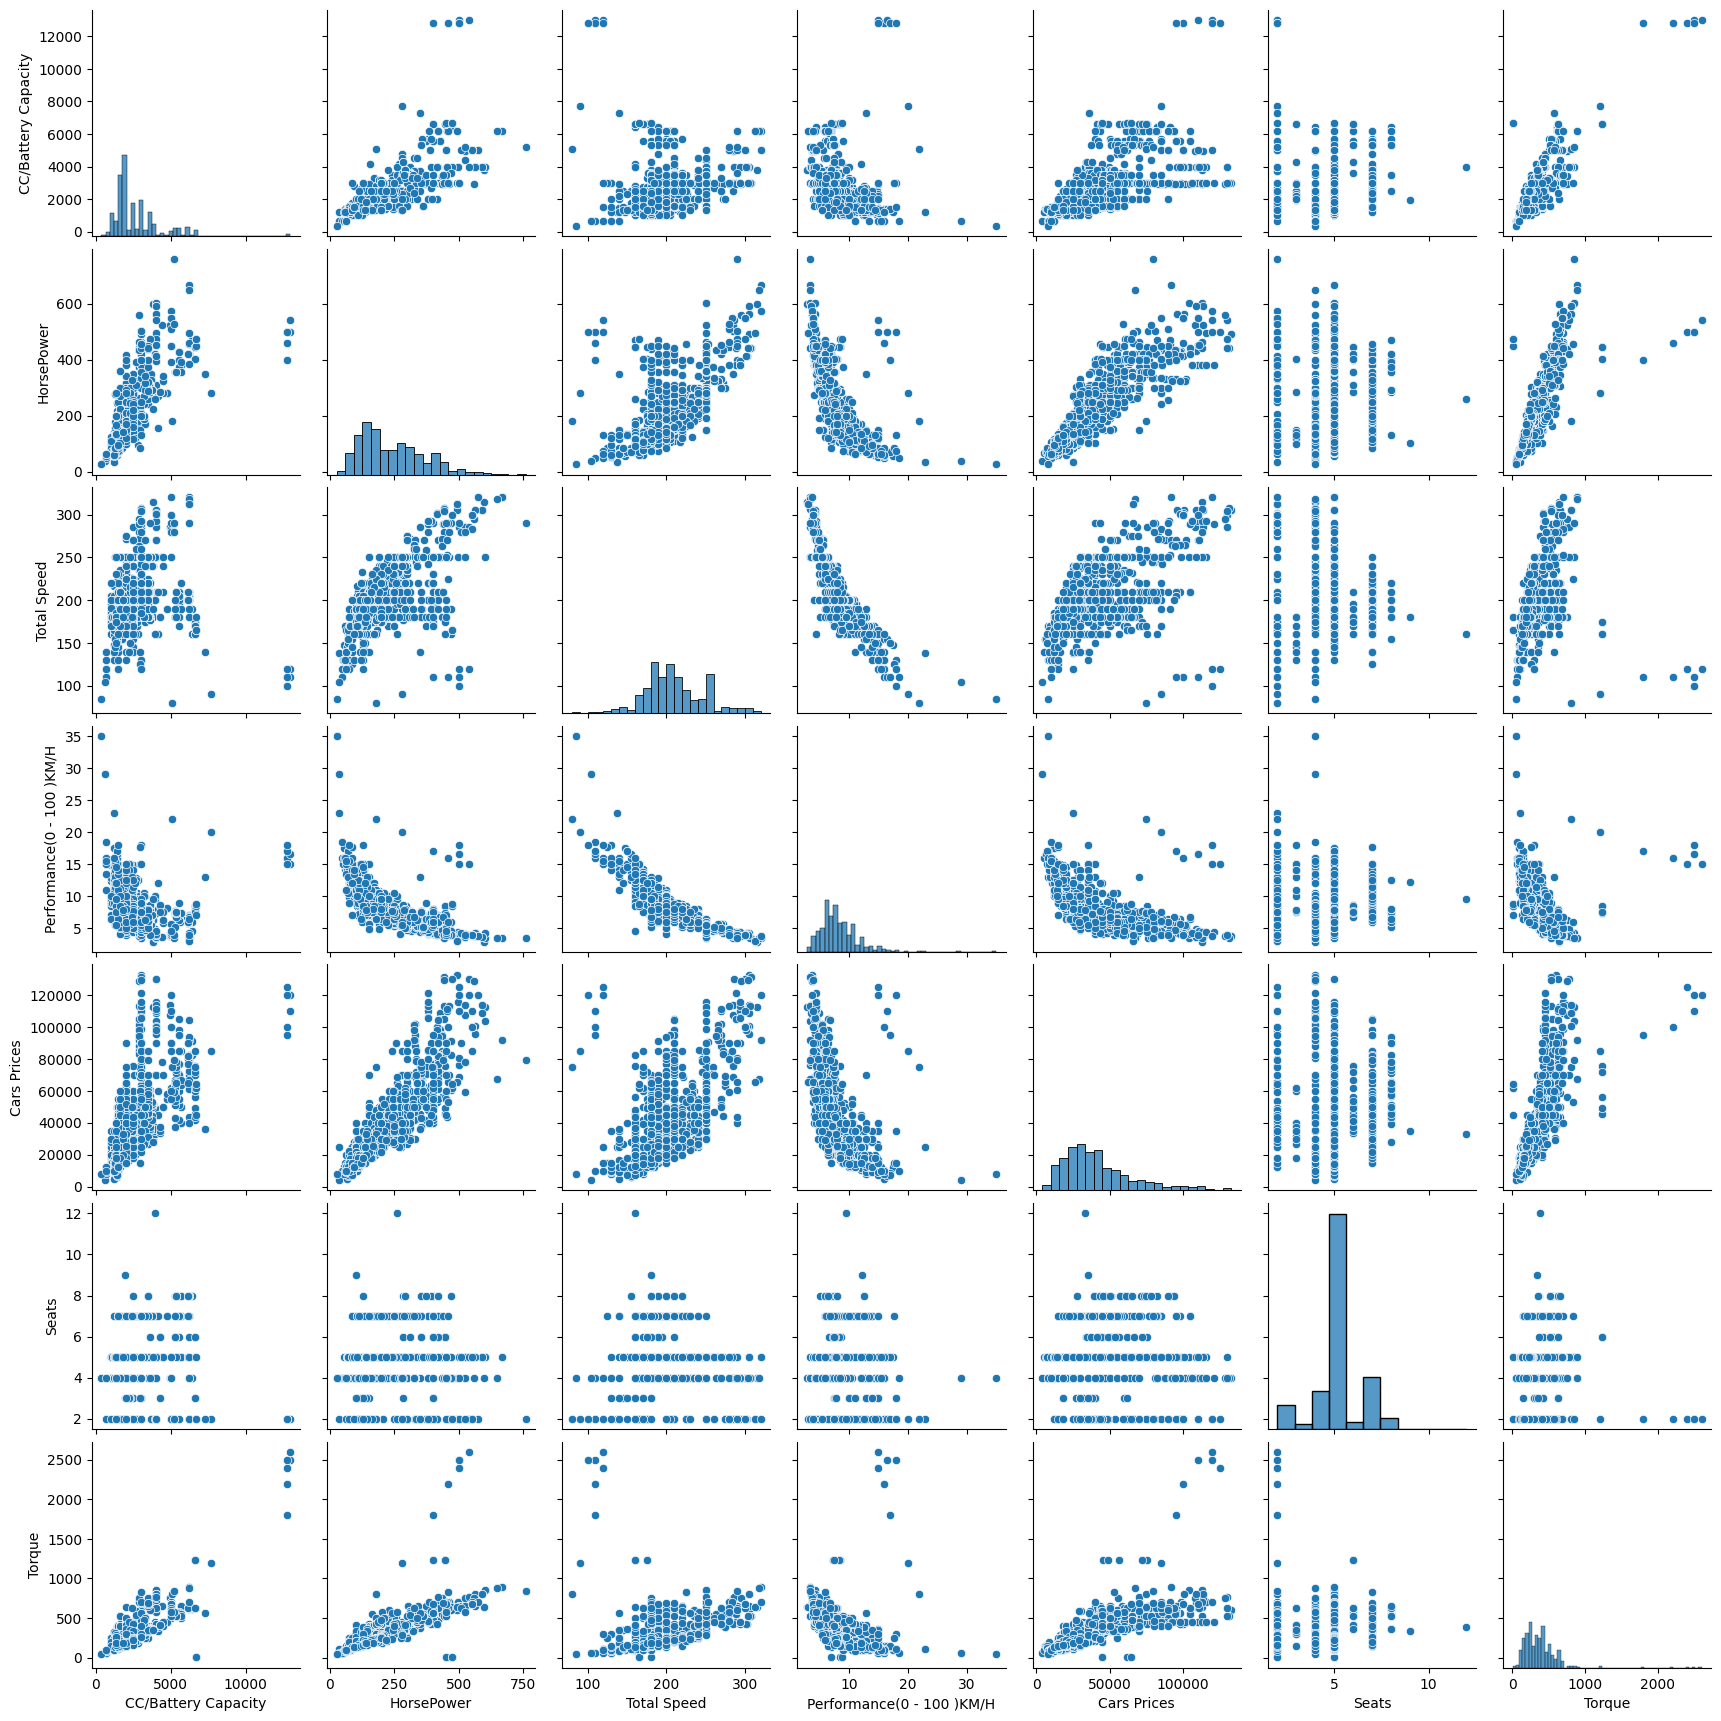

In [31]:
sns.pairplot(df_without_outliers)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

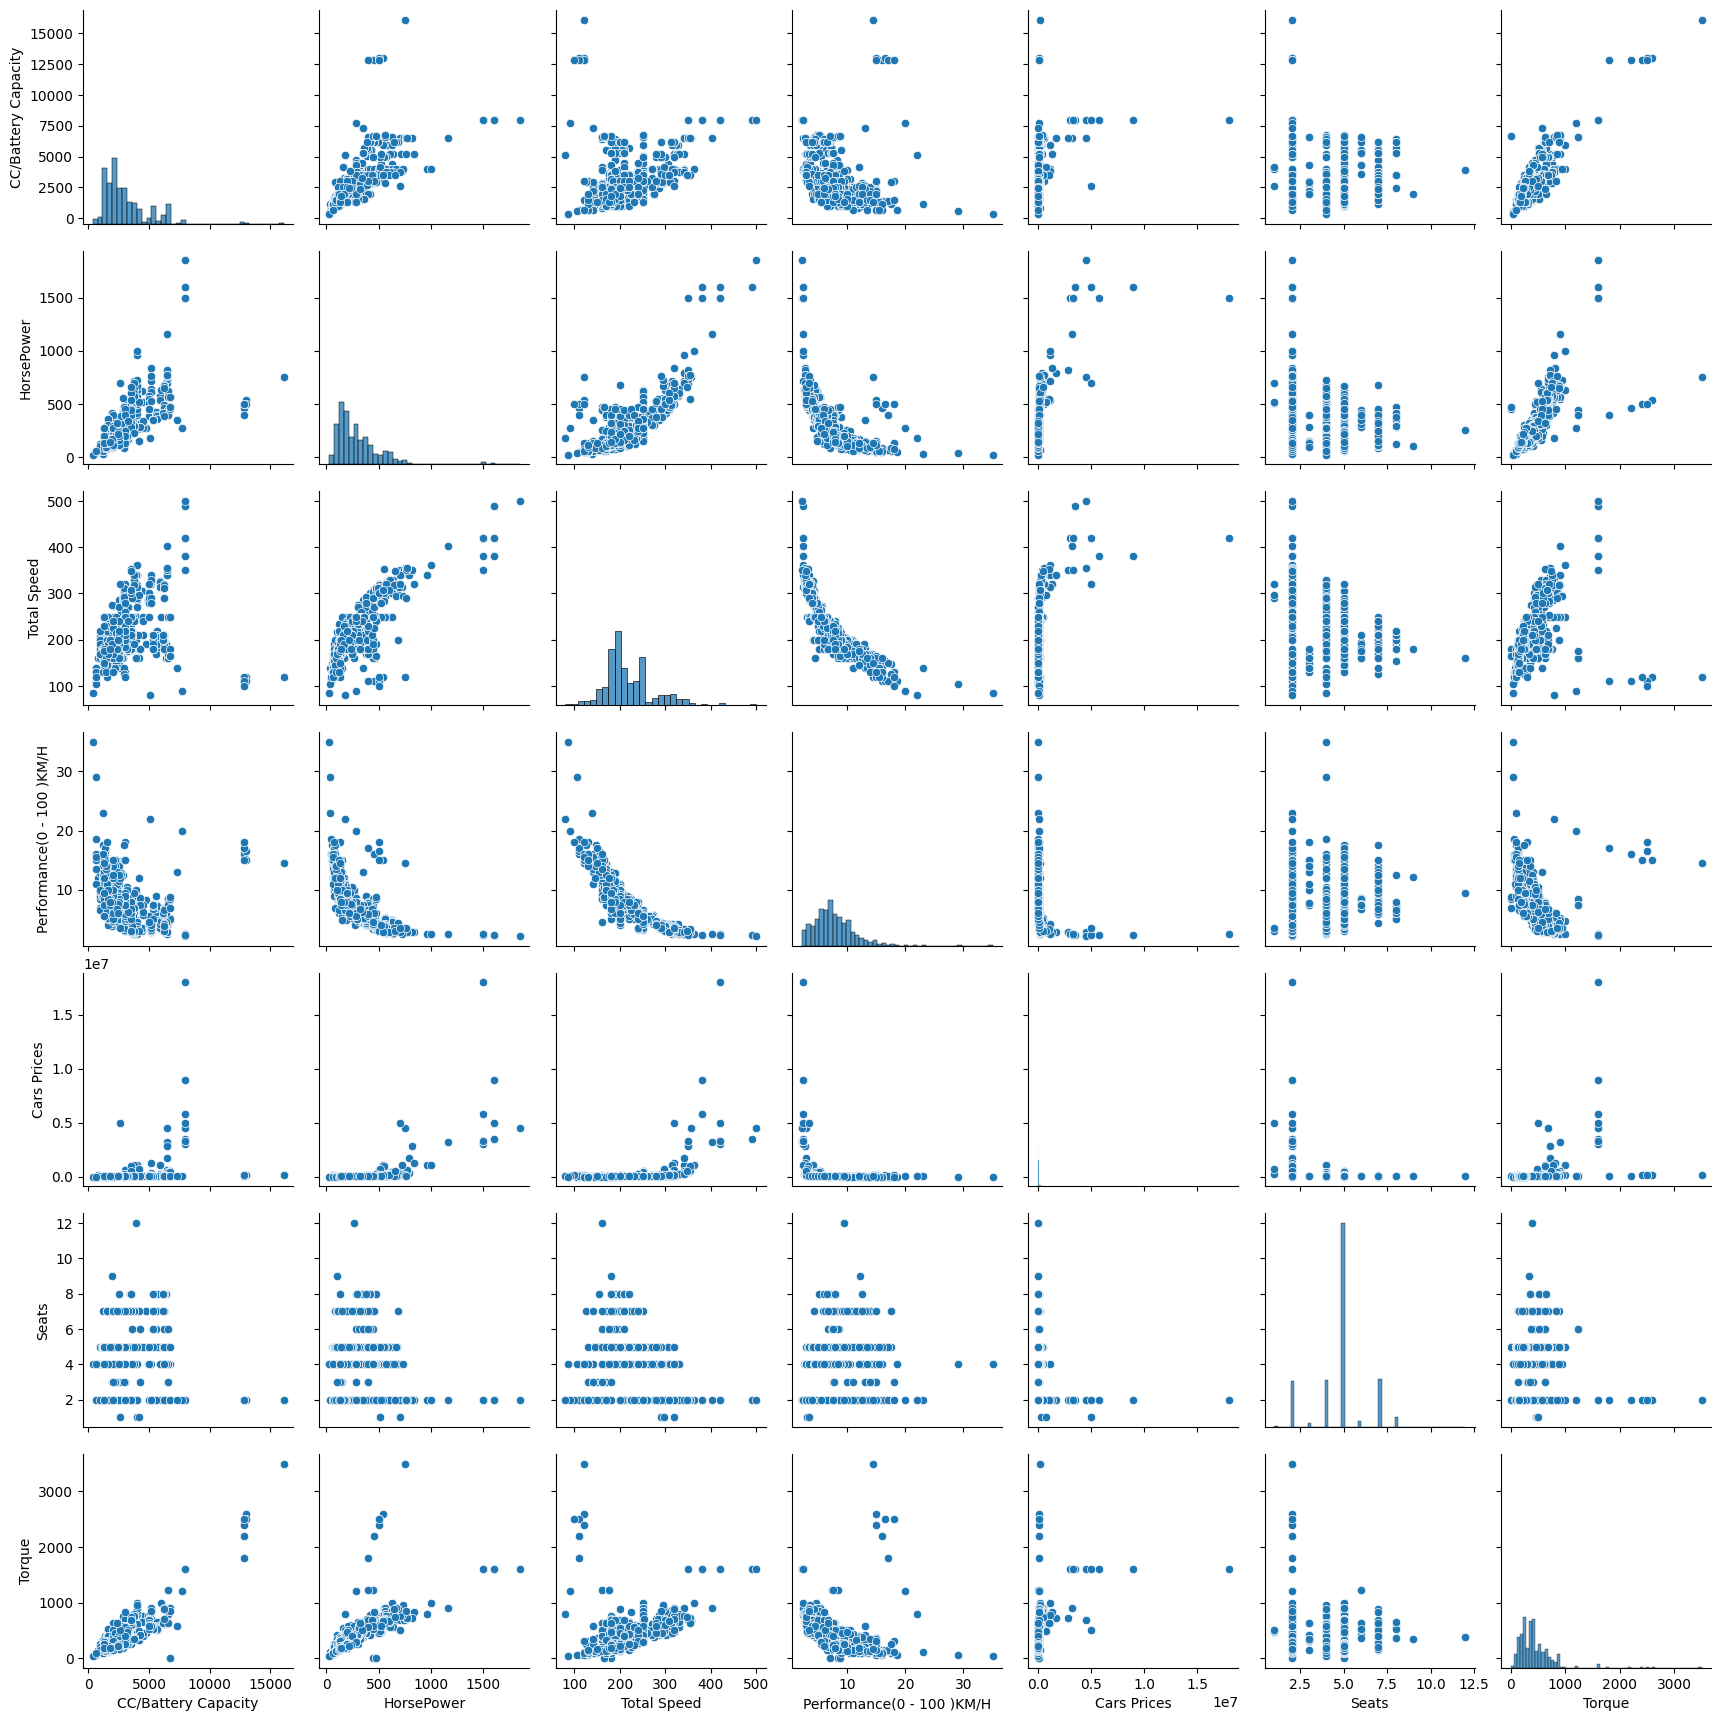

In [32]:
sns.pairplot(df_CC)

# Modeling

In [33]:
df_CC.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Fuel_Types,brand_labels
0,FERRARI,SF90 STRADALE,V8,3990,963,340,2.5,1100000,plug in hyrbrid,2,800,Hybrid,Ultra Luxury
1,ROLLS ROYCE,PHANTOM,V12,6749,563,250,5.3,460000,Petrol,5,900,Petrol,Ultra Luxury
2,Ford,KA+,1.2L Petrol,1200,70,165,10.5,12000,Petrol,5,100,Petrol,Upper Mid-Range
3,MERCEDES,GT 63 S,V8,3982,630,250,3.2,161000,Petrol,4,900,Petrol,Luxury
4,AUDI,AUDI R8 Gt,V10,5204,602,320,3.6,253290,Petrol,2,560,Petrol,Luxury


# Selecting features and Preprocessing Them

In [51]:
X = df_without_outliers.drop(columns = ['Fuel Types','Company Names','Cars Names','Engines','Cars Prices'])
y = df_without_outliers['Cars Prices']

In [1]:
import time
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# ML Modelleri
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [54]:
# Define feature lists
nominal_features = ['Fuel_Types']
ordinal_features = ['brand_labels']

# Define order for ordinal encoding
size_order = [['Budget','Mid-Range','Upper Mid-Range','Luxury','Ultra Luxury']]

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), nominal_features),
        ('ordinal', OrdinalEncoder(categories=size_order), ordinal_features),
    ],
    remainder='passthrough'
)

In [55]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [56]:
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

In [57]:
X_train

array([[-0.34809177, -0.32409253, -0.03610791, ..., -0.44731019,
         1.4627149 ,  1.13942961],
       [-0.34809177, -0.32409253, -0.03610791, ..., -0.25429536,
        -0.0635963 , -0.47169102],
       [-0.34809177, -0.32409253, -0.03610791, ..., -0.2864645 ,
         2.2258705 ,  0.67468327],
       ...,
       [ 2.87280561, -0.32409253, -0.03610791, ...,  0.71077879,
        -0.0635963 ,  0.32944314],
       [-0.34809177, -0.32409253, -0.03610791, ..., -1.28370779,
        -0.0635963 ,  0.81189409],
       [-0.34809177, -0.32409253, -0.03610791, ..., -0.02911139,
        -0.0635963 , -0.51595257]])

In [58]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, min_samples_split=4, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=10, weights="distance", metric="minkowski"),
    "SVR": SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale'),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
}

In [59]:
results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Training
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Prediction
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time
    
    # Performance Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append([name, mae, mse, r2, train_time, predict_time])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R² Score", "Training Time (sec)", "Prediction Time (sec)"])
results_df

Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training KNN...
Training SVR...
Training Neural Network (MLP)...


,Model,MAE,MSE,R² Score,Training Time (sec),Prediction Time (sec)
0,Linear Regression,8892.950576,1.560747e+08,0.779230,0.004029,0.000184
1,Decision Tree,7647.021158,1.362213e+08,0.807313,0.003753,0.000254
2,Random Forest,5775.736977,7.036818e+07,0.900463,0.610093,0.010092
3,Gradient Boosting,5720.962837,7.106679e+07,0.899475,0.346187,0.001631
4,XGBoost,5683.807999,6.801696e+07,0.903789,0.146106,0.001964
5,KNN,5870.090697,8.089356e+07,0.885575,0.001353,0.004562
6,SVR,16006.896611,5.097194e+08,0.278994,0.033318,0.008298
7,Neural Network (MLP),7830.822670,1.209492e+08,0.828915,7.838287,0.000677


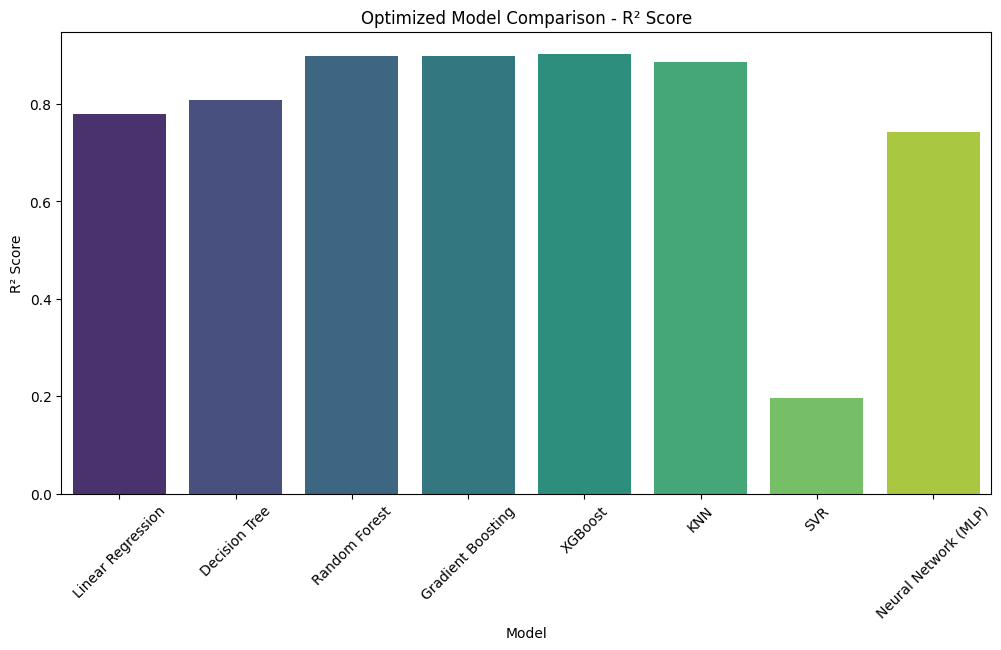

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x="Model", y="R² Score", palette="viridis")
plt.xticks(rotation=45)
plt.title("Optimized Model Comparison - R² Score")
plt.show()

## XGBoost is giving the best result

In [60]:
import warnings
warnings.filterwarnings('ignore')

## Fine Tuning XGboost

In [61]:
pram_grid = {
            'n_estimators': [75,100, 200,300],
            'learning_rate': [0.05,0.075],
            'max_depth': [3, 6,8,10]
        }

In [102]:
import warnings
warnings.filterwarnings('ignore')
xgr = XGBRegressor()
grid = GridSearchCV(
        estimator=xgr,
        param_grid=pram_grid,
        cv=5,
        scoring=r2_score,
        n_jobs=-1,
    )
grid.fit(X_train, y_train)
print(f"✅ Best Parameters: {grid.best_params_}")
print(f"✅ Best CV Score: {grid.best_score_:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: r2_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: r2_score() takes 2 po

✅ Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
✅ Best CV Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: r2_score() takes 2 positional arguments but 3 were given

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: r2_score() takes 2 po

In [101]:
xgr = XGBRegressor(n_estimators=100, learning_rate=0.075, max_depth=6, subsample=0.5, colsample_bytree=0.8, random_state=42)
xgr.fit(X_train,y_train)
y_pred = xgr.predict(X_test)
r2_score(y_pred,y_test)

0.8901946090637896